# Predefined SKLearn models comparison

This notebook discusses some built-in models in SKLearn

## Step 0: Import modules

In [1]:
# %load mlp_comparison.py
import src.core as mlApi
import src.core_configs as configs

Using TensorFlow backend.


## Step 1: Implement required methods

A method is implemented to perform initialization, training and predictions for a model. These are all functions of the high-level API, and thus nothing out of the ordinary. The function is simply implemented for simplification of the following code.

In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, score=True):
    mlApi.initModels(modelList)
    mlApi.trainModels(retrain)
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
        plot=plot,
        score=score,
    )

# Dataset D

## Step 2: Define dataset specifics

In [3]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('D', 'A', '10min')

## Step 3: Initiate and divide data

In [4]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 50TT001 - Cooling side inlet temperature
Col. 4 : 50TT002 - Cooling side outlet temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows



## Step 4: Define models

The same models are used for each dataset, however they have to be redefined because each model is initiated using the dataset current stored in the API state.

In [5]:
svm = mlApi.SupportVectorMachine('SVM')
adaboost = mlApi.AdaBoostRegressor('AdaBoost')
bagging = mlApi.BaggingRegressor('Bagging')
randforest = mlApi.RandomForest('Random Forest')
tree = mlApi.DecisionTree('Decision Tree')
elnet = mlApi.ElasticNet('Elastic Net')
linear = mlApi.Linear_Regularized('Linear')

## Step 5: Make predictions

Predictions are made in bulks in order to enhance plot readability. The following bulks are discussed invidually: 
1. First, the simplest model architectures with fewest neurons per layer
2. Then, the more complex model architectures
3. Finally, the ensemble models

This is performed for each of the three datasets; *D*, *F* and *G*.

Training model SVM
Training model AdaBoost
Training model Bagging
Training model Random Forest
Training model Decision Tree
Training model Elastic Net
Training model Linear

c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for


Model prediction scores
+---------------+-------------+------------+
|     Model     | Train score | Test score |
+---------------+-------------+------------+
|      SVM      |    0.9945   |   0.8663   |
|    AdaBoost   |    0.9881   |   0.7384   |
|    Bagging    |    0.9989   |   0.7703   |
| Random Forest |    0.9993   |   0.7639   |
| Decision Tree |     1.0     |   0.7658   |
|  Elastic Net  |    0.9797   |   0.7615   |
|     Linear    |    0.9947   |   0.8842   |
+---------------+-------------+------------+


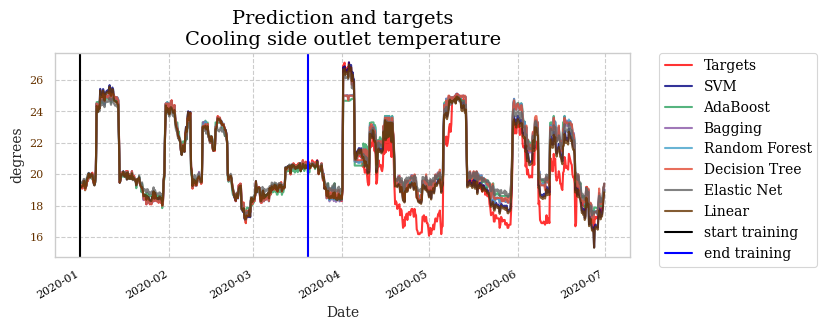

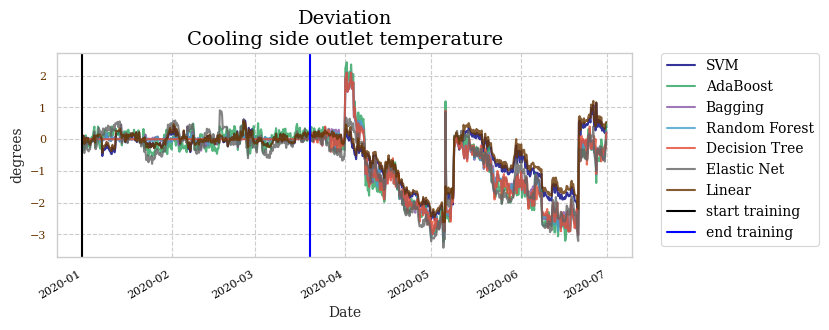

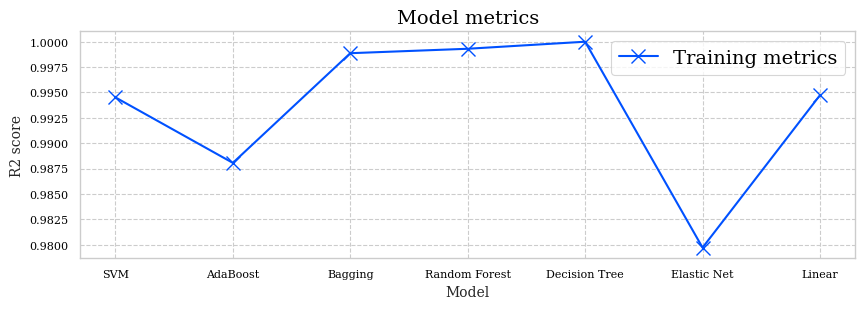

In [6]:
modelList = [
    svm,
    adaboost,
    bagging,
    randforest,
    tree,
    elnet,
    linear,
]

initTrainPredict(modelList)

Training model Bagging


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


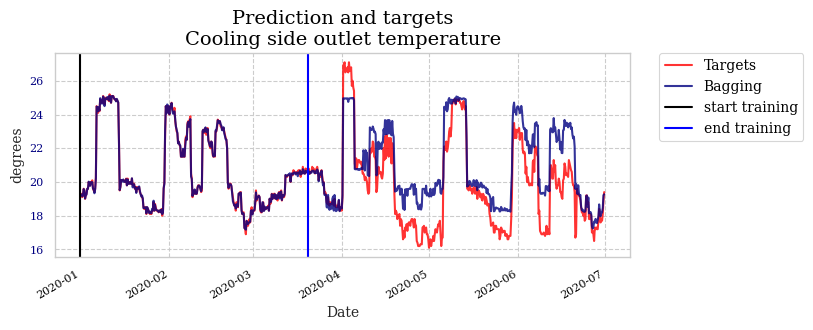

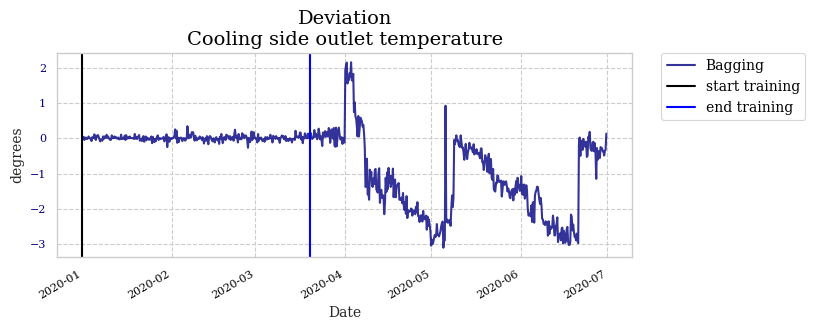

Training model Random Forest


C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


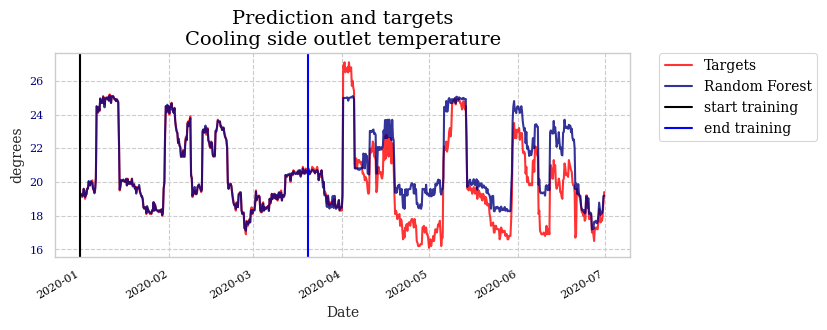

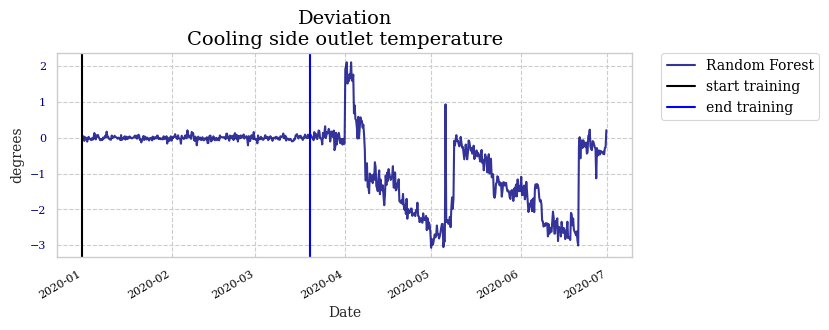

Training model Decision Tree


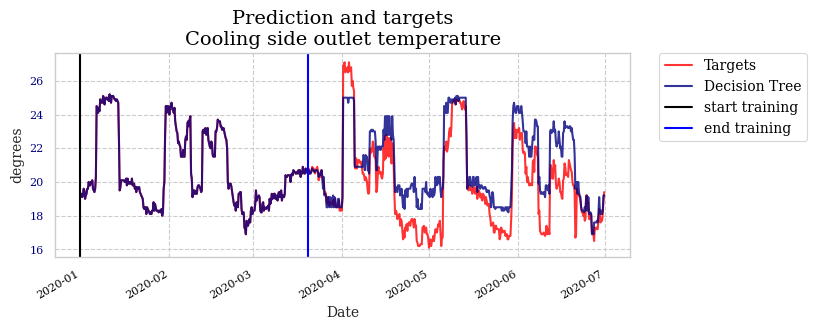

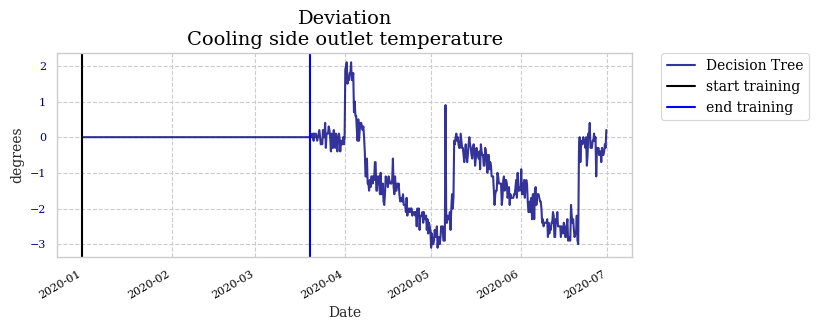

In [7]:
modelList = [
    bagging,
    randforest,
    tree,
]

for model in modelList:
    initTrainPredict([model], score=False)

mlApi.reset()

# Dataset F

In [8]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('F', 'A', '30min')

In [9]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y - Varm side A temperatur inn
Col. 2 : TIC0101_CA_YX - Varm side A temperatur ut
Col. 3 : TT0104_MA_Y - Varm side B temperatur inn
Col. 4 : TIC0103_CA_YX - Varm side B temperatur ut
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y - Varm side A trykkfall
Col. 8 : PDT0119_MA_Y - Varm side B trykkfall
Col. 9 : PDT0118_MA_Y - Varm side C trykkfall
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y - Kald side A temperatur ut
Col. 13 : TT0652_MA_Y - Kald side B temperatur ut
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y - Kald side A ventilåpning
Col. 16 : TIC0103_CA_Y - Kald side B ventilåpning
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0106_MA_Y - Varm side C te

In [10]:
svm = mlApi.SupportVectorMachine('SVM')
adaboost = mlApi.AdaBoostRegressor('AdaBoost')
bagging = mlApi.BaggingRegressor('Bagging')
randforest = mlApi.RandomForest('Random Forest')
tree = mlApi.DecisionTree('Decision Tree')
elnet = mlApi.ElasticNet('Elastic Net')
linear = mlApi.Linear_Regularized('Linear')

Training model SVM
Training model AdaBoost


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training model Bagging


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Training model Random Forest


C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


Training model Decision Tree
Training model Elastic Net
Training model Linear


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model prediction scores
+---------------+-------------+------------+
|     Model     | Train score | Test score |
+---------------+-------------+------------+
|      SVM      |    0.3072   |   0.0875   |
|    AdaBoost   |    0.3838   |   0.2217   |
|    Bagging    |    0.9387   |   0.1186   |
| Random Forest |    0.9554   |   0.1617   |
| Decision Tree |     1.0     |   0.1616   |
|  Elastic Net  |    0.3053   |   0.2789   |
|     Linear    |    0.3234   |   0.0673   |
+---------------+-------------+------------+


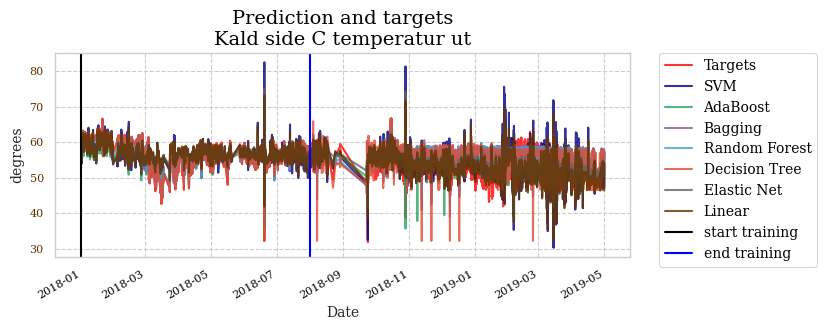

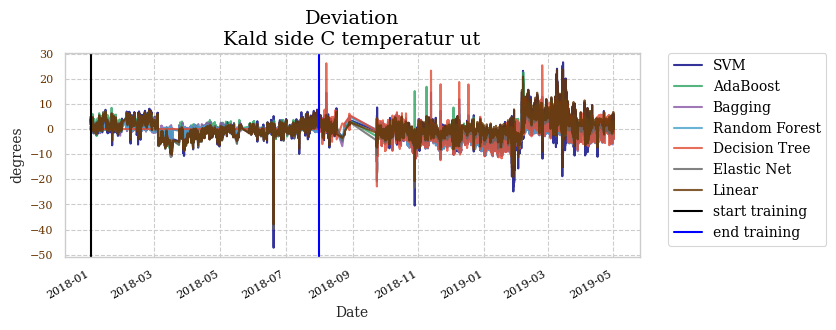

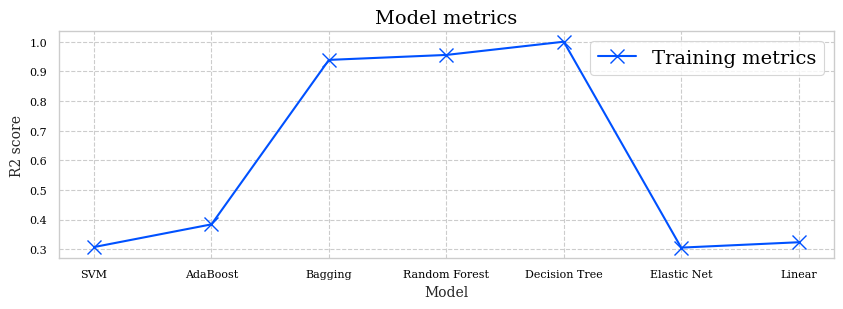

In [11]:
modelList = [
    svm,
    adaboost,
    bagging,
    randforest,
    tree,
    elnet,
    linear,
]

initTrainPredict(modelList)

Training model Bagging


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


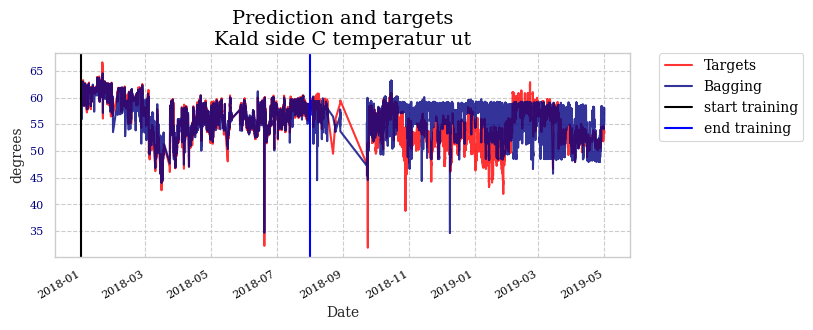

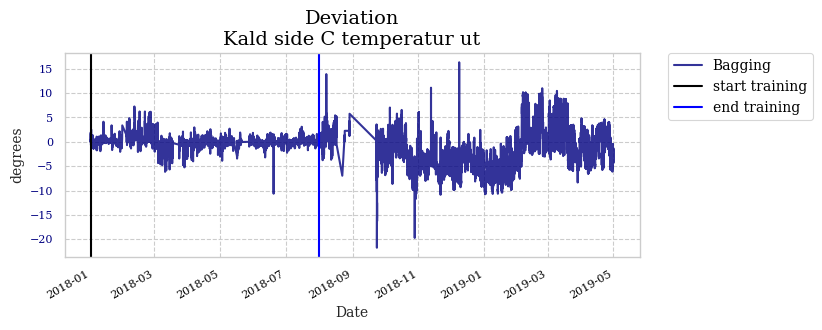

Training model Random Forest


C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


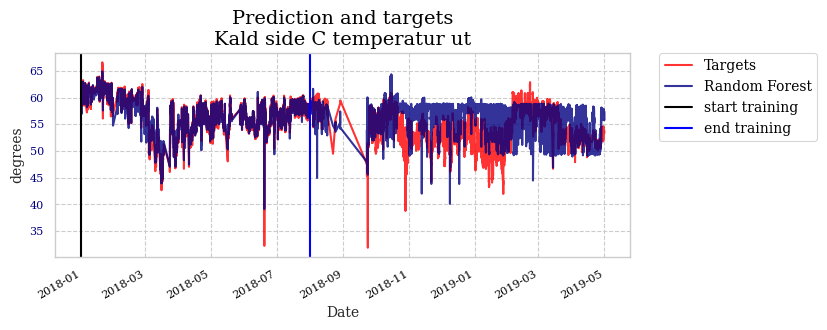

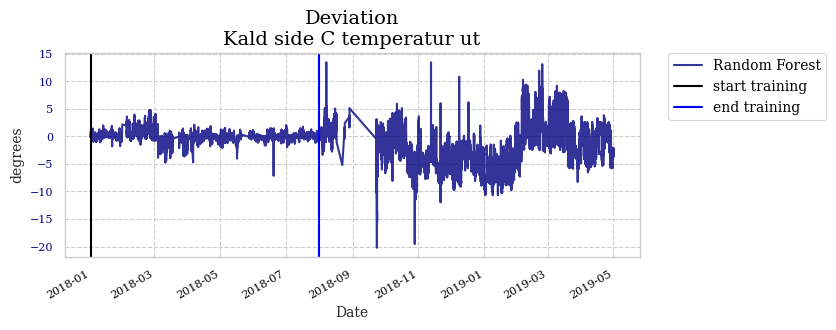

Training model Decision Tree


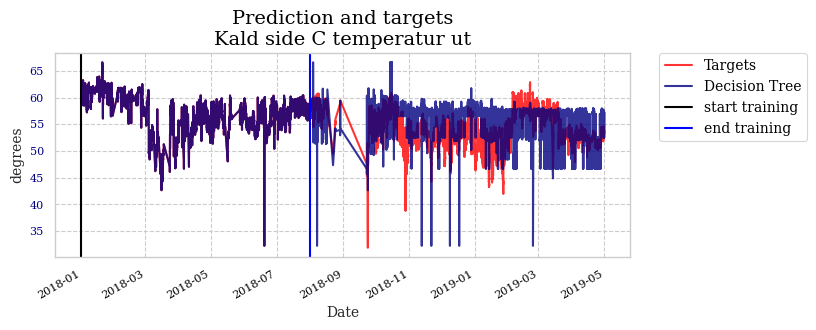

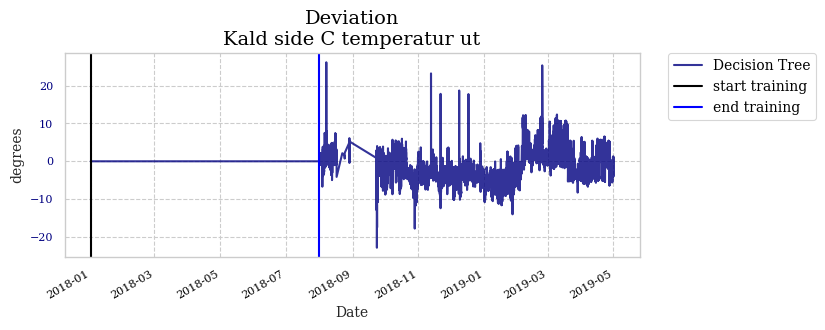

In [12]:
modelList = [
    bagging,
    randforest,
    tree,
]

for model in modelList:
    initTrainPredict([model], score=False)

In [13]:
mlApi.reset()

# Dataset G

In [14]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('G', 'A', '10min')

In [15]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : TI0066 - Process side Temperature out
Col. 1 : TZI0012 - Process side Temperature in
Col. 2 : FI0010 - Process side flow rate
Col. 3 : TT0025 - Cooling side Temperature in
Col. 4 : TT0026 - Cooling side Temperature out

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 13885 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 146747 rows



In [16]:
svm = mlApi.SupportVectorMachine('SVM')
adaboost = mlApi.AdaBoostRegressor('AdaBoost')
bagging = mlApi.BaggingRegressor('Bagging')
randforest = mlApi.RandomForest('Random Forest')
tree = mlApi.DecisionTree('Decision Tree')
elnet = mlApi.ElasticNet('Elastic Net')
linear = mlApi.Linear_Regularized('Linear')

Training model SVM


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training model AdaBoost


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training model Bagging


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Training model Random Forest


C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


Training model Decision Tree
Training model Elastic Net
Training model Linear


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model prediction scores
+---------------+-------------+------------+
|     Model     | Train score | Test score |
+---------------+-------------+------------+
|      SVM      |    0.4077   |  -1.2175   |
|    AdaBoost   |    0.4497   |  -1.6666   |
|    Bagging    |    0.9451   |  -2.0965   |
| Random Forest |    0.9601   |  -2.0679   |
| Decision Tree |     1.0     |  -2.3717   |
|  Elastic Net  |    0.3991   |  -1.5847   |
|     Linear    |    0.4229   |  -1.5136   |
+---------------+-------------+------------+


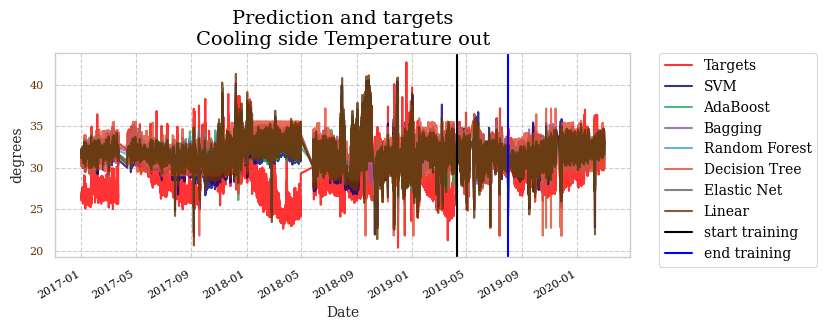

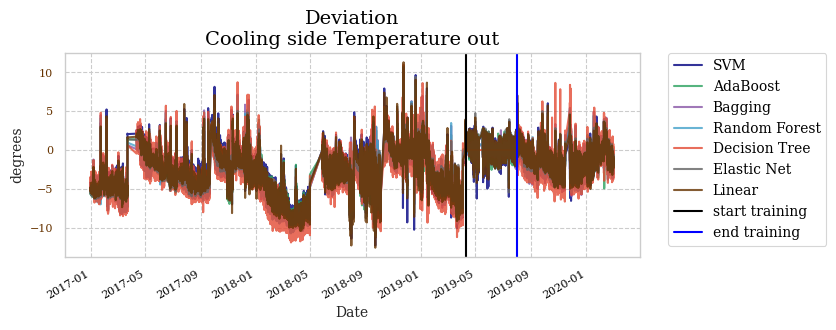

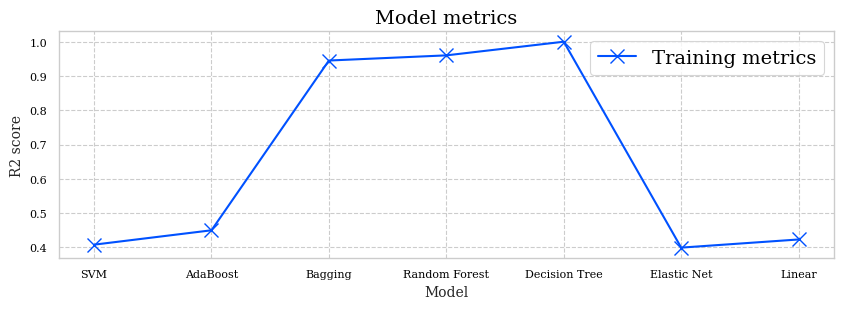

In [17]:
modelList = [
    svm,
    adaboost,
    bagging,
    randforest,
    tree,
    elnet,
    linear,
]

initTrainPredict(modelList)

Training model Bagging


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


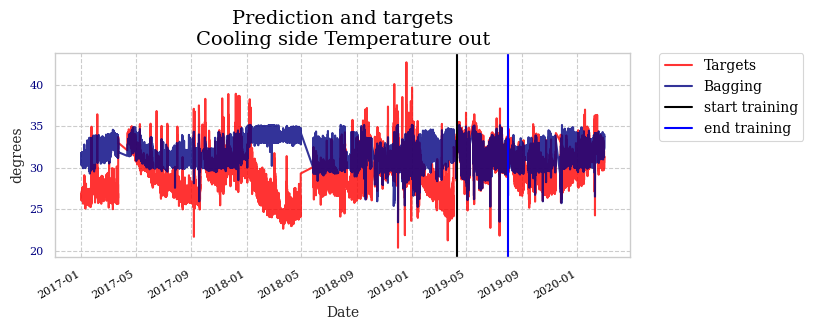

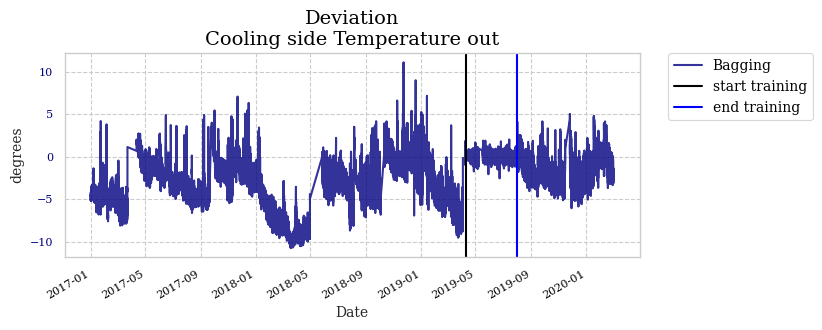

Training model Random Forest


C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


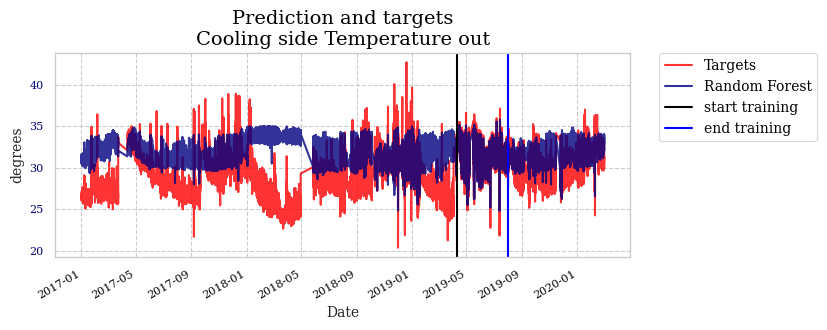

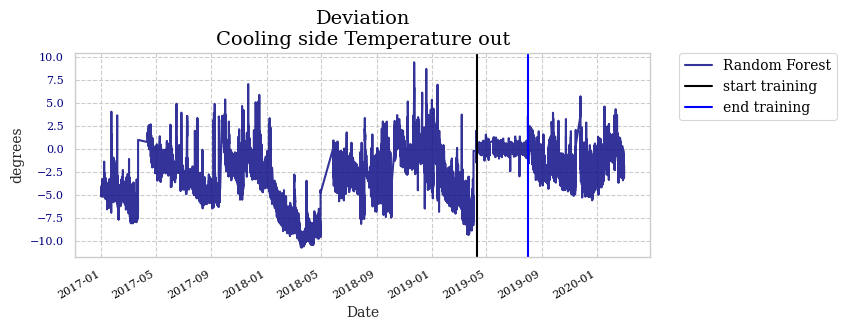

Training model Decision Tree


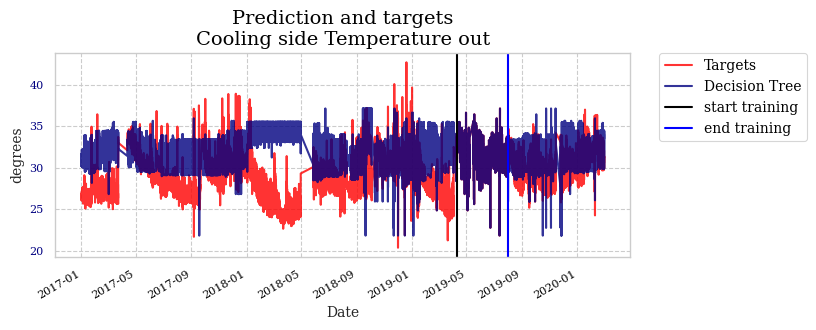

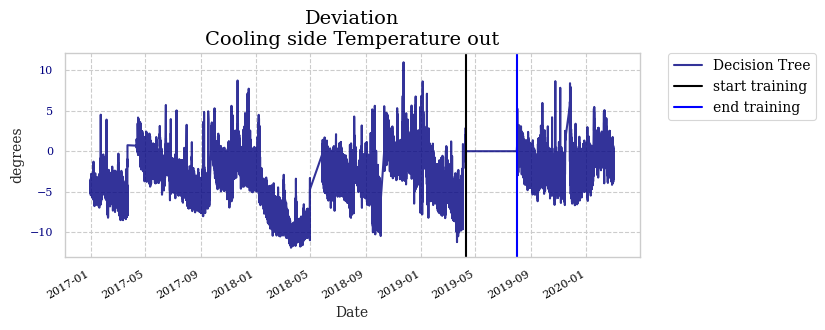

In [18]:
modelList = [
    bagging,
    randforest,
    tree,
]

for model in modelList:
    initTrainPredict([model], score=False)